In [33]:
# Homework 5 Part 1

In [34]:
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()

In [36]:
X=iris.data
y=iris.target

In [37]:
from sklearn.cluster import KMeans

In [38]:
wcss = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=24)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [39]:
import matplotlib.pyplot as plt
import numpy as np

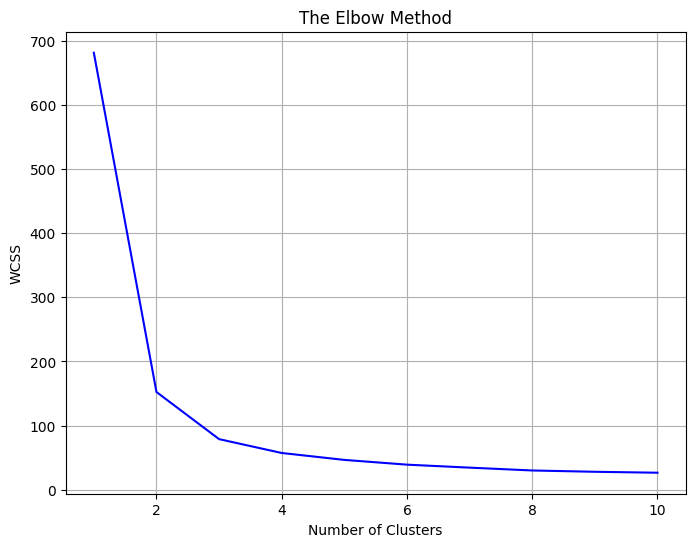

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, linestyle='-', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [41]:
# Homework 5 Part 2

In [42]:
from sklearn.datasets import fetch_openml

In [43]:
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
import time

In [49]:
start_time_no_pca = time.time()

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train_scaled, y_train)
pred_no_pca = logisticRegr.predict(X_test_scaled)
time_no_pca = time.time() - start_time_no_pca
accuracy_no_pca = accuracy_score(y_test, pred_no_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [54]:
start_time_pca = time.time()
logisticRegr_pca = LogisticRegression(solver = 'lbfgs')
logisticRegr_pca.fit(X_train_pca, y_train)
pred_pca = logisticRegr_pca.predict(X_test_pca)
time_pca = time.time() - start_time_pca
accuracy_pca = accuracy_score(y_test, pred_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
print("Accuracy without PCA:", f"{accuracy_no_pca:%}")
print("Accuracy with PCA:", f"{accuracy_pca:%}")
print("Time without PCA:", time_no_pca)
print("Time with PCA:", time_pca)

Accuracy without PCA: 91.764286%
Accuracy with PCA: 92.271429%
Time without PCA: 29.56518268585205
Time with PCA: 12.700516939163208
